# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [3]:
t_arch = pd.read_csv("twitter-archive-enhanced.csv")
t_arch.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Make directory if it doesn't already exist
img_pred = 'img_pred'
if not os.path.exists(img_pred):
    os.makedirs(img_pred)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open(os.path.join(img_pred, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
img = pd.read_csv("img_pred/image-predictions.tsv" , sep = "\t")

In [8]:
img.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True )

In [ ]:
##### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = t_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
json_df = {}
with open('tweet_json.txt' , 'r') as outfile :
    file = outfile.readlines()
for i in range(len(file)) :
    json_df[i] = json.loads(file[i])


In [10]:
dfjson = pd.DataFrame.from_dict(json_df , orient = 'index')

In [11]:
dfjson.head(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2326 non-null   object 
 1   id                             2326 non-null   int64  
 2   id_str                         2326 non-null   object 
 3   full_text                      2326 non-null   object 
 4   truncated                      2326 non-null   bool   
 5   display_text_range             2326 non-null   object 
 6   entities                       2326 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2326 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [17]:
dfjson.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.326000e+03,7.700000e+01,7.700000e+01,2326.000000,2326.000000,2.600000e+01
mean,7.417895e+17,7.440692e+17,2.040329e+16,2461.379192,7029.622528,8.113972e+17
std,6.822240e+16,7.524295e+16,1.260797e+17,4168.024944,10921.253686,6.295843e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,0.000000,6.721083e+17
25%,6.780814e+17,6.757073e+17,3.589728e+08,492.250000,1219.000000,7.761338e+17
50%,7.178159e+17,7.032559e+17,4.196984e+09,1147.500000,3040.500000,8.281173e+17
75%,7.986600e+17,8.233264e+17,4.196984e+09,2847.500000,8573.500000,8.637581e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,70408.000000,144275.000000,8.860534e+17


### Quality issues


1. filter the retweets , not all retweets have images , we need original ratings

2. Display text range must be integer

3. created_at must be a date type

4. None values must be null not object type

5. there are Missing data , we have to clean the data seet from those missing data

6. Check for duplicated ids

7. Name column has some non valide names

8. entities and extended_entities must be dicts 

9. Leave only dogs retweets


### Tidiness issues
1. Make Only one Dataset

2. Make sure each column contains only one variable


## Cleaning Data

In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
df1 = dfjson.copy()
df2 = img.copy()
df3 = t_arch.copy()

### Tidiness Issues :

### Issue #1: Make only one dataset

#### Define: First we need to merge all datasets to one dataset to make a good view on the informations we have 

#### Code

In [13]:
df2.rename(columns = {"tweet_id" : 'id' , "p1":"type"} , inplace = True)

In [14]:
dfmerg1 = df1.merge(df2 , on = 'id')

In [15]:
df3.rename(columns = {"tweet_id" : 'id'} , inplace = True)

In [16]:
df_tot = dfmerg1.merge(df3 , on = 'id')

#### Test

In [29]:
df_tot.head(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


### Issue #2: Make sure each column contains only one variable

#### Define : some columns contains multiple variables in them we should merge them to make use of every information effectively

#### Code

In [32]:
df_1_clean = df_tot.copy()

In [37]:
# First replace None in stage columns with empty string as follows.
df_1_clean.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

In [38]:
# Then combine stage columns.
df_1_clean['stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

In [39]:
# Then format entries with multiple dog stages which appeared like doggopupper.

df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [40]:
df_v1 = df_1_clean.copy()

In [41]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2056 non-null   object 
 1   id                             2056 non-null   int64  
 2   id_str                         2056 non-null   object 
 3   full_text                      2056 non-null   object 
 4   truncated                      2056 non-null   bool   
 5   display_text_range             2056 non-null   object 
 6   entities                       2056 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source_x                       2056 non-null   object 
 9   in_reply_to_status_id_x        23 non-null     float64
 10  in_reply_to_status_id_str      23 non-null     object 
 11  in_reply_to_user_id_x          23 non-null     float64
 12  in_reply_to_user_id_str        23 non-null     o

#### Test

In [42]:
df_v1.sample(6)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1862,Wed Nov 25 17:40:53 +0000 2015,669571471778410496,669571471778410496,This is Keith. He's had 13 DUIs. 7/10 that's t...,False,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669571453801508864, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,,,None,,None
646,Wed Aug 31 21:47:27 +0000 2016,771102124360998913,771102124360998913,This is Charlie. He works for @TODAYshow. Supe...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771102115905372160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,,,None,,None
1656,Mon Dec 07 02:13:55 +0000 2015,673686845050527744,673686845050527744,This is George. He's upset that the 4th of Jul...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673686768529645568, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,,,None,,None
852,Sat Jun 11 21:27:17 +0000 2016,741743634094141440,741743634094141440,Meet Aqua. She's a sandy pupper. Not sure how ...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 741743615312056320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/741743634...,11,10,Aqua,,,pupper,,pupper
27,Sun Jul 16 20:14:00 +0000 2017,886680336477933568,886680336477933568,This is Derek. He's late for a dog meeting. 13...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 886680331239161856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,,,None,,None
1175,Sun Feb 14 03:01:06 +0000 2016,698703483621523456,698703483621523456,This is Rusty. He has no respect for POULTRY p...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698703472636641280, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,,,None,,None


### Quality Issues :

### Issue#1 : filter the retweets , not all retweets have images , we need original ratings

#### Define : Get only the original tweets , not the retweeted ones (contains images) 

#### Code

In [43]:
#That means we have to leave only the ids where retweeted status has null value
df_v1 = df_v1[df_v1.retweeted_status.isnull()]

#### Test

In [44]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     1985 non-null   object 
 1   id                             1985 non-null   int64  
 2   id_str                         1985 non-null   object 
 3   full_text                      1985 non-null   object 
 4   truncated                      1985 non-null   bool   
 5   display_text_range             1985 non-null   object 
 6   entities                       1985 non-null   object 
 7   extended_entities              1985 non-null   object 
 8   source_x                       1985 non-null   object 
 9   in_reply_to_status_id_x        23 non-null     float64
 10  in_reply_to_status_id_str      23 non-null     object 
 11  in_reply_to_user_id_x          23 non-null     float64
 12  in_reply_to_user_id_str        23 non-null     o

### Issue #2 : Display text range must be integer

#### Define : display text range must be an integer so that we can make comparaison and visualastions

#### Code  

In [45]:
#let's see how is it given
df_v1.display_text_range[:5]

0     [0, 85]
1    [0, 138]
2    [0, 121]
3     [0, 79]
4    [0, 138]
Name: display_text_range, dtype: object

In [46]:
num = []
for i in df_v1.display_text_range :
    num.append(i[-1])

In [47]:
df_v1['display_text_range'] = np.array(num)

In [48]:
df_v1.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1946,Sat Nov 21 01:59:37 +0000 2015,667885044254572545,667885044254572545,Meet Stu. Stu has stacks on stacks and an eye ...,False,117,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667885029767446528, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/667885044...,10,10,Stu,,,None,,None
861,Wed Jun 08 02:09:24 +0000 2016,740365076218183684,740365076218183684,When the photographer forgets to tell you wher...,False,64,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 740365062632812544, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/740365076...,10,10,None,,,None,,None
1894,Mon Nov 23 23:23:31 +0000 2015,668932921458302977,668932921458302977,This is Herald. He likes to swing. Subtle tong...,False,140,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668932892672851968, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,,,None,,None
1176,Sat Feb 13 22:29:29 +0000 2016,698635131305795584,698635131305795584,Here we are witnessing five Guatemalan Birch F...,False,134,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698635005506015234, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,,,None,,None
1774,Mon Nov 30 00:22:57 +0000 2015,671122204919246848,671122204919246848,Two miniature golden retrievers here. Webbed p...,False,136,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671122197432418304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,,,None,,None


### Issue #3 :  created_at must be a date type

#### Define : if we take time in hours it well be more usefull since there are huge number of different values , it will be easier for use

#### Code

In [49]:
df_v1.created_at = pd.to_datetime(df_v1.created_at)

#### Test 

In [53]:
print(df_v1.created_at)

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2051   2015-11-16 00:24:50+00:00
2052   2015-11-16 00:04:52+00:00
2053   2015-11-15 23:21:54+00:00
2054   2015-11-15 23:05:30+00:00
2055   2015-11-15 22:32:08+00:00
Name: created_at, Length: 1985, dtype: datetime64[ns, UTC]


### Issue #4 : None values must be null not object type

#### Define : if any column has not its right type we will have problems in the analysis , like time in integer , dtae in date type , text range integer

#### Code

In [93]:
df_v1.iloc[:,:].replace('None', '', inplace=True)

#### Test

In [94]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 2035
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1054 non-null   datetime64[ns, UTC]
 1   id                             1054 non-null   int64              
 2   id_str                         1054 non-null   object             
 3   full_text                      1054 non-null   object             
 4   truncated                      1054 non-null   bool               
 5   display_text_range             1054 non-null   int32              
 6   entities                       1054 non-null   object             
 7   extended_entities              1054 non-null   object             
 8   source_x                       1054 non-null   object             
 9   in_reply_to_status_id_x        0 non-null      float64            
 10  in_reply_to_status_id_st

In [99]:
df_v1.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
636,2016-09-03 22:02:38+00:00,772193107915964416,772193107915964416,This is Willem. He's a Penn State pupper. Thin...,False,104,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772193097816150016, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,,,pupper,,pupper
1146,2016-02-19 18:24:26+00:00,700747788515020802,700747788515020802,We only rate dogs. Pls stop sending in non-can...,False,139,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700747775256821764, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,,,,,
356,2017-01-07 16:59:28+00:00,817777686764523521,817777686764523521,"This is Dido. She's playing the lead role in ""...",False,140,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817777588030476288, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,"doggo,pupper"
573,2016-10-02 15:10:30+00:00,782598640137187329,782598640137187329,This is Timmy. He's quite large. According to ...,False,108,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 782598630494449665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,,,,,
708,2016-07-31 20:21:02+00:00,759846353224826880,759846353224826880,This is Kirby. He's a Beneblip Cumberpat. Pret...,False,102,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759846345045835776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,,,,,


### Issue #5 : there are Missing data , we have to clean the data seet from those missing data

#### Define : we need to remove missing data from our dataset 

#### Code

In [48]:
#in our case , i only have the column retweeted status that contains null data so we should drop it
df_v1.drop("retweeted_status" , axis = 1 ,inplace = True)

#### Test

In [49]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1985 non-null   int64         
 1   rating_numerator    1985 non-null   int64         
 2   name                1985 non-null   object        
 3   retweet_count       1985 non-null   int64         
 4   favorite_count      1985 non-null   int64         
 5   type                1985 non-null   object        
 6   p1_dog              1985 non-null   bool          
 7   display_text_range  1985 non-null   int32         
 8   created_date        1985 non-null   datetime64[ns]
 9   created_time        1985 non-null   int32         
dtypes: bool(1), datetime64[ns](1), int32(2), int64(4), object(2)
memory usage: 141.5+ KB


### Issue #6: Check for duplicated ids

#### Define : We must check if there is any duplicated ids or rows because it will affect our investigation



#### Code

In [100]:
#Checking
df_v1.id.duplicated().all()

False


#### Test

In [101]:
#We have no duplicated ids

### Issue #7 :Name column has some non valide names

#### Define : dogs names should be valid names , there are some None object values , it should be null values 

#### Code

In [86]:
len(list(df_v1.name.unique()))

934

In [87]:
df_v1 = df_v1.query("name not in ['None' ,'a','such','not','just','this','the','by','all']")

In [88]:
len(list(df_v1.name.unique()))

925

#### Test

In [89]:
'None' in df_v1.name

False

### Issue #8 :  entities and extended_entities must be dicts

#### Define : in the description , most ratings are higher than 10, but the vast majority under 20 , there are some very big numbers that can affect our analysis

#### Code

In [62]:
df_v1.replace({"entities": dict , "extended_entities" : dict} , inplace = True)


In [63]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1985 non-null   datetime64[ns, UTC]
 1   id                             1985 non-null   int64              
 2   id_str                         1985 non-null   object             
 3   full_text                      1985 non-null   object             
 4   truncated                      1985 non-null   bool               
 5   display_text_range             1985 non-null   int32              
 6   entities                       1985 non-null   object             
 7   extended_entities              1985 non-null   object             
 8   source_x                       1985 non-null   object             
 9   in_reply_to_status_id_x        23 non-null     float64            
 10  in_reply_to_status_id_st

#### Test

In [67]:
df_v1.entities[5]['hashtags']

[{'text': 'BarkWeek', 'indices': [129, 138]}]

### Issue #9 : Leave only dogs retweets

#### Define : We have some picture that does not represent dogs , so we have to deleve any picture that can describe something else other than dogs

#### Code

In [90]:
#We can know wether it is a dog or not from the column p1_dog
df_v1 = df_v1.query("p1_dog == True")

#### Test

In [91]:
df_v1.p1_dog.all() == True

True

In [92]:
df_v1.sample(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_x,in_reply_to_status_id_x,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
163,2017-04-13 16:05:56+00:00,852553447878664193,852553447878664193,This is Jarod. He likes having his belly brush...,False,124,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852553437929721865, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,,,None,,None
185,2017-03-30 00:56:03+00:00,847251039262605312,847251039262605312,This is Furzey. He's doing an elevated sandy z...,False,100,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847251028009336833, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,,,None,,None
1558,2015-12-12 22:04:39+00:00,675798442703122432,675798442703122432,This is Bernie. He just touched a boob for the...,False,88,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675798434532581376, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,,,None,,None
1725,2015-12-02 16:49:14+00:00,672095186491711488,672095186491711488,This is Tuco. That's the toast that killed his...,False,83,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672095178996523008, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,,,None,,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
df_v1.to_csv("twitter_archive_master.csv" , index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
df_v1.drop(columns = ['id'] , axis = 1 , inplace = True)
df_v1.head()


,rating_numerator,name,retweet_count,favorite_count,type,p1_dog,display_text_range,created_date,created_time
1,13,Tilly,5280,29230,Chihuahua,True,138,2017-08-01,0
2,12,Archie,3466,21974,Chihuahua,True,121,2017-07-31,0
4,12,Franklin,7723,35168,basset,True,138,2017-07-29,16
6,13,Jax,1649,10323,Appenzeller,True,140,2017-07-28,16
8,13,Zoey,3605,24433,Irish_terrier,True,122,2017-07-27,16


## Insights:
1.Does the type of the dog influence the retweets ?

2.Does the the text have an effect on the likes ?

3.wich top 3 loved dogs ?

###    Insight1 : Does the type of the dog influence the retweets?

In [61]:
dog_type = df_v1.groupby('type').mean()

In [62]:
dog_type.head(4)

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time
type,,,,,,
Afghan_hound,9.666667,4770.333333,14659.666667,1.0,103.333333,11.000000
Airedale,10.222222,1257.111111,5145.888889,1.0,107.666667,5.666667
American_Staffordshire_terrier,10.666667,1293.777778,5068.111111,1.0,111.111111,11.777778
Appenzeller,13.000000,1649.000000,10323.000000,1.0,140.000000,16.000000


In [63]:
dog_type.describe()

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time
count,109.000000,109.000000,109.000000,109.0,109.000000,109.000000
mean,10.618872,1933.583571,7282.883426,1.0,115.654790,10.381273
std,1.121050,1385.244469,4580.931637,0.0,12.110790,4.410576
min,5.000000,30.000000,93.000000,1.0,82.666667,0.000000
25%,10.095238,1004.000000,4011.666667,1.0,107.600000,7.612903
50%,10.937500,1651.636364,6409.545455,1.0,115.222222,10.500000
75%,11.315789,2372.500000,9545.705882,1.0,124.190476,12.750000
max,13.000000,8955.250000,23801.666667,1.0,140.000000,23.000000


In [64]:
ret_count = [30,1004,1651,2372,8955]
grps = ["grp1","grp2","grp3","grp4"]

In [65]:
dog_type['dog_category'] = pd.cut(dog_type['retweet_count'], ret_count, labels=grps)

In [108]:
dog_type.query("dog_category == 'grp4'").index

Index(['Afghan_hound', 'Australian_terrier', 'Bedlington_terrier',
       'Border_terrier', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua',
       'English_springer', 'French_bulldog', 'Gordon_setter', 'Great_Pyrenees',
       'Irish_setter', 'Irish_water_spaniel', 'Leonberg', 'Norwegian_elkhound',
       'Pembroke', 'Saluki', 'Samoyed', 'Walker_hound', 'basset', 'bloodhound',
       'boxer', 'briard', 'cocker_spaniel', 'giant_schnauzer',
       'golden_retriever', 'wire-haired_fox_terrier'],
      dtype='object', name='type')

In [67]:
groups = dog_type.groupby("dog_category").mean()

In [68]:
groups

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time
dog_category,,,,,,
grp1,9.615638,699.760597,2678.004630,1.0,123.222428,10.546914
grp2,10.641166,1367.292415,5487.074783,1.0,112.834435,9.240299
grp3,11.030674,1986.195328,8105.345545,1.0,113.003499,10.541551
grp4,11.308752,3470.553575,12515.116458,1.0,112.873213,11.487869


### Insight2 : Does the the text have an effect on the likes ?

In [69]:
df_v1.display_text_range.corr(df_v1.favorite_count)

-0.10760339753522119

#### -> There is a negative correlation between text length and favorite count , so the long the text the less likes

### Insight3 :  Wich top 3 loved dogs ?

In [70]:
dog_type.describe()

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time
count,109.000000,109.000000,109.000000,109.0,109.000000,109.000000
mean,10.618872,1933.583571,7282.883426,1.0,115.654790,10.381273
std,1.121050,1385.244469,4580.931637,0.0,12.110790,4.410576
min,5.000000,30.000000,93.000000,1.0,82.666667,0.000000
25%,10.095238,1004.000000,4011.666667,1.0,107.600000,7.612903
50%,10.937500,1651.636364,6409.545455,1.0,115.222222,10.500000
75%,11.315789,2372.500000,9545.705882,1.0,124.190476,12.750000
max,13.000000,8955.250000,23801.666667,1.0,140.000000,23.000000


In [71]:
fav_count = [93,4011.666667,6409.545455,9545.705882,23801.666667]
lvl = ["Bad","Average","Good","Excellent"]
dog_type['dog_classifier'] = pd.cut(dog_type['favorite_count'], fav_count, labels=lvl)
dog_type.sample(5)

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time,dog_category,dog_classifier
type,,,,,,,,
toy_poodle,11.032258,2164.290323,6023.935484,1.0,118.774194,7.612903,grp3,Average
Great_Dane,10.714286,1513.000000,5895.000000,1.0,120.000000,10.571429,grp2,Average
Bernese_mountain_dog,11.200000,1273.300000,5794.100000,1.0,113.900000,11.200000,grp2,Average
Yorkshire_terrier,10.500000,1165.000000,4349.500000,1.0,117.250000,9.375000,grp2,Average
Newfoundland,9.500000,963.750000,3420.000000,1.0,104.750000,11.500000,grp1,Bad


In [72]:
top = dog_type.query("dog_classifier == 'Excellent'").sort_values(by=['favorite_count'])

In [73]:
top.tail(5)

,rating_numerator,retweet_count,favorite_count,p1_dog,display_text_range,created_time,dog_category,dog_classifier
type,,,,,,,,
Bedlington_terrier,11.000000,3119.000000,16011.333333,1.0,119.000000,18.333333,grp4,Excellent
French_bulldog,11.428571,4428.428571,18425.714286,1.0,124.190476,8.571429,grp4,Excellent
English_springer,11.000000,7953.600000,20330.800000,1.0,118.000000,15.200000,grp4,Excellent
standard_poodle,11.000000,8955.250000,22018.750000,1.0,108.000000,11.750000,NaN,Excellent
Saluki,12.333333,4687.333333,23801.666667,1.0,118.000000,6.666667,grp4,Excellent


#### -> Saluki ,Standard Poodle and English Springer are the most loved dogs categories

## Visualization

### Visual 1 :

<AxesSubplot:title={'center':'likes per textlength'}, xlabel='display_text_range', ylabel='favorite_count'>

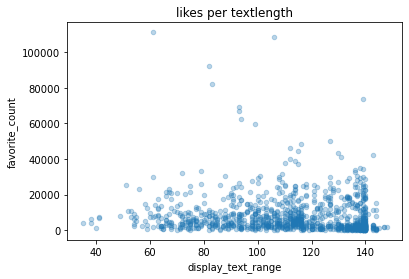

In [100]:
df_v1.plot("display_text_range" ,"favorite_count" , kind = "scatter" , title = "likes per textlength" , alpha = 0.3)

#### -> We can see that most of the tweets that has less likes are the ones that has long text

### Visual 2 :

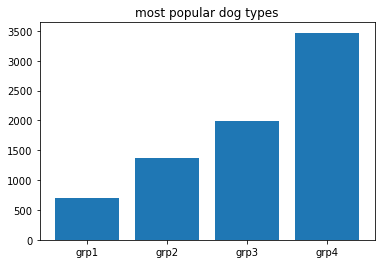

In [107]:
plt.bar(groups.index ,groups["retweet_count"])
plt.title("most popular dog types")
plt.show()

### Visual 3 :

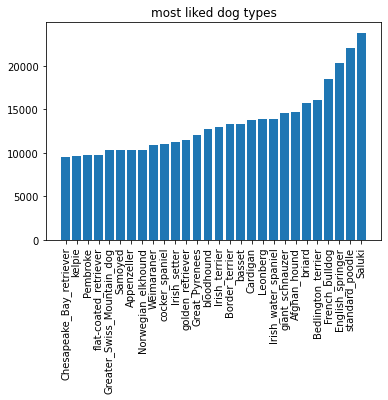

In [88]:
%matplotlib inline

plt.bar(top.index ,top["favorite_count"] )
plt.title("most liked dog types")
plt.xticks(rotation = 90)
plt.show()